In [1]:
#settign up and loading data
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\beetl\AppData\Local\Temp\pip-install-vcgm_1ug\tensorflow-gpu_d8c53f509aa04976b7957a2217898ada\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
#loading data
import numpy as np
from matplotlib import pyplot as plt

In [15]:
#tf data flow api to build data pipeline(tf.data.Dataset)
data = tf.keras.utils.image_dataset_from_directory('SAUNAR_final')

Found 4400 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [23]:
batch[0].shape

(32, 256, 256, 3)

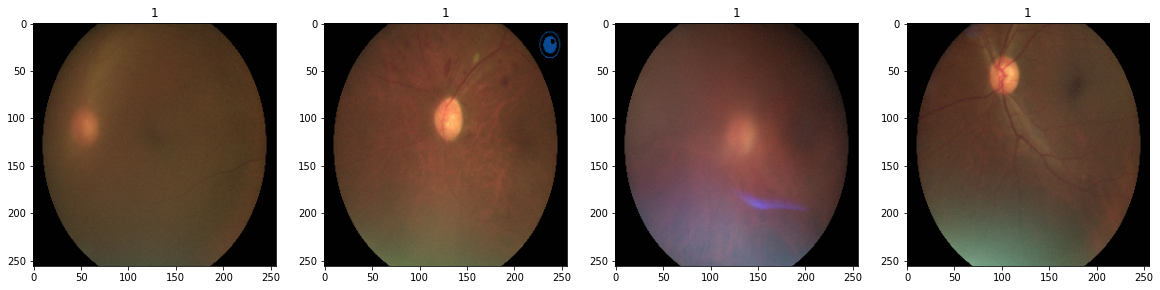

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
#scaling data
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
data.as_numpy_iterator().next()

(array([[[[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

In [24]:
#split data
len(data)#138 batches

138

In [26]:
train_size = int(len(data)*.8)+1
test_size = int(len(data)*.2)

print(train_size,test_size)

111 27


In [27]:
data_train = data.take(train_size)
data_test = data.skip(train_size).take(test_size)

In [28]:
#building dnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [33]:
#training the model
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(data_train, epochs=25, callbacks=[tensorboard_callback])

Epoch 1/25
111/111 [==============================] - 82s 713ms/step - loss: 0.5216 - accuracy: 0.7942
Epoch 2/25
111/111 [==============================] - 79s 696ms/step - loss: 0.5168 - accuracy: 0.7945
Epoch 3/25
111/111 [==============================] - 80s 702ms/step - loss: 0.5088 - accuracy: 0.7965
Epoch 4/25
111/111 [==============================] - 79s 700ms/step - loss: 0.5078 - accuracy: 0.7981
Epoch 5/25
111/111 [==============================] - 79s 700ms/step - loss: 0.5084 - accuracy: 0.7970
Epoch 6/25
111/111 [==============================] - 81s 713ms/step - loss: 0.5032 - accuracy: 0.7993
Epoch 7/25
111/111 [==============================] - 82s 724ms/step - loss: 0.5084 - accuracy: 0.7967
Epoch 8/25
111/111 [==============================] - 82s 719ms/step - loss: 0.5068 - accuracy: 0.7981
Epoch 9/25
111/111 [==============================] - 82s 722ms/step - loss: 0.5028 - accuracy: 0.7987
Epoch 10/25
111/111 [==============================] - 82s 727ms/step - l

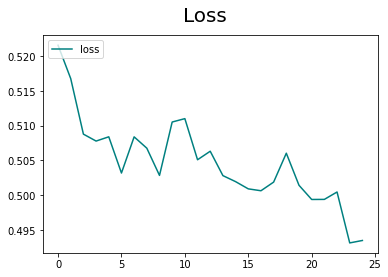

In [38]:
#plloting performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

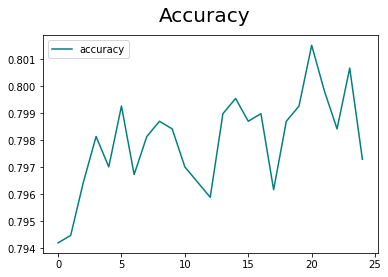

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
#evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in data_test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 323ms/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.80473375, shape=(), dtype=float32) tf.Tensor(0.9956076, shape=(), dtype=float32) tf.Tensor(0.8018868, shape=(), dtype=float32)
